In [1]:
#Importing Train Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [3]:
train = pd.read_csv("Electric_Production.csv",)
train.shape

(397, 2)

In [12]:
143206 / 2
train.rename(columns={"IPG2211A2N":"Value"}, inplace=True)

In [13]:
train.head(10)

,DATE,Value
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


## **Visual Test**

### Line Plot

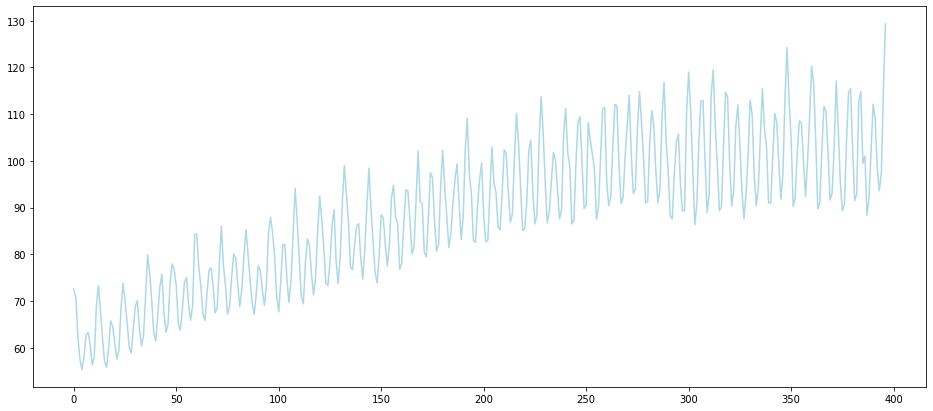

In [14]:
plt.figure(figsize=(16,7));
plt.plot(train["Value"],color="lightblue");

### Histogram Plot

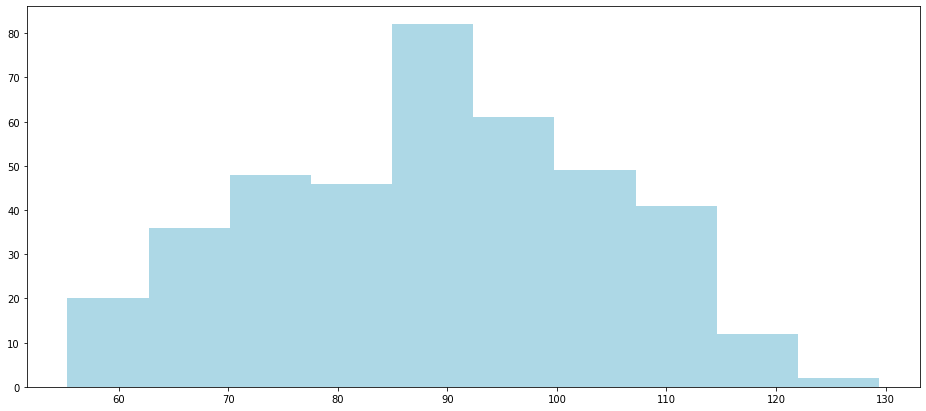

In [15]:
plt.figure(figsize=(16,7));
plt.hist(train["Value"],color="lightblue");

## **Summary Statistics**

In [16]:
#Split the data
train_1=train[0:199]
train_2=train[200:397]

In [17]:
#Mean of data
train_1.mean()

/tmp/ipykernel_6370/388402942.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_1.mean()


Value    77.497413
dtype: float64

In [18]:
train_2.mean()

/tmp/ipykernel_6370/3644765761.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_2.mean()


Value    100.257903
dtype: float64

In [19]:
#Variance of data
train_1.var()

/tmp/ipykernel_6370/1394540215.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_1.var()


Value    123.225819
dtype: float64

In [20]:
train_2.var()

/tmp/ipykernel_6370/3030773698.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_2.var()


Value    91.677346
dtype: float64

## **Augmentated Dicky Fuller Test**

In [21]:
t = train["Value"].values
timeseries = adfuller(t)

print('ADF Statistic: %f' % timeseries[0])
print('p-value: %f' % timeseries[1])
print('Critical Values:')

for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))

if timeseries[0] > timeseries[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print ("Reject Ho - Time Series is Stationary")

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Failed to Reject Ho - Time Series is Non-Stationary
